<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9512578 entries, 0 to 9512577
Data columns (total 15 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   origin_city                   int64  
 1   destination_city              int64  
 2   origin_ISO                    object 
 3   destination_ISO               object 
 4   year                          int64  
 5   commodity_index               int64  
 6   mode                          int64  
 7   container_type                int64  
 8   ship_type                     object 
 9   flow(tonne)                   float64
 10  distance(km)                  float64
 11  Mode_name                     object 
 12  IFM_HS                        object 
 13  Unit logistics costs ($/ton)  float64
 14  Model                         int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 1.1+ GB
None


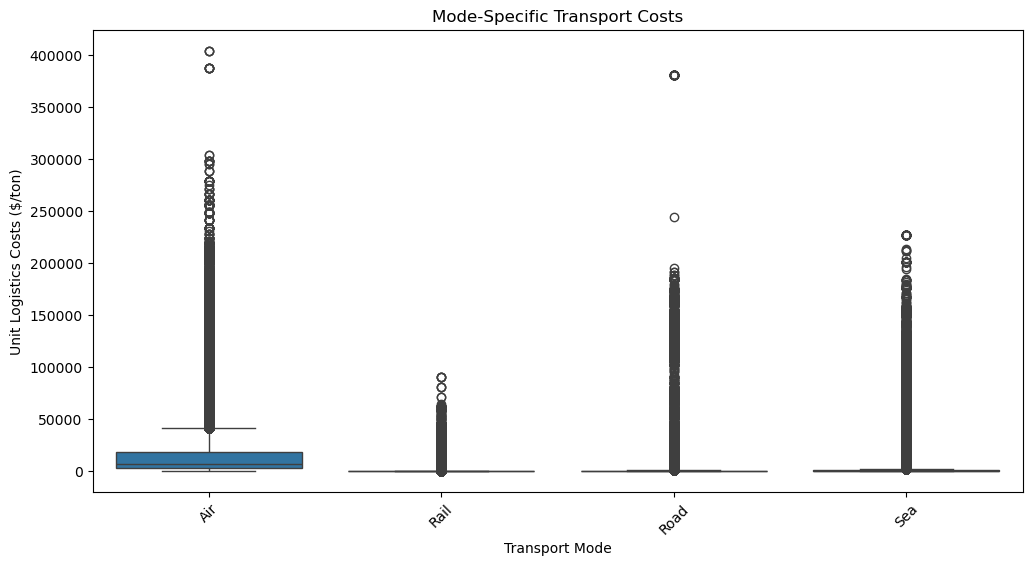

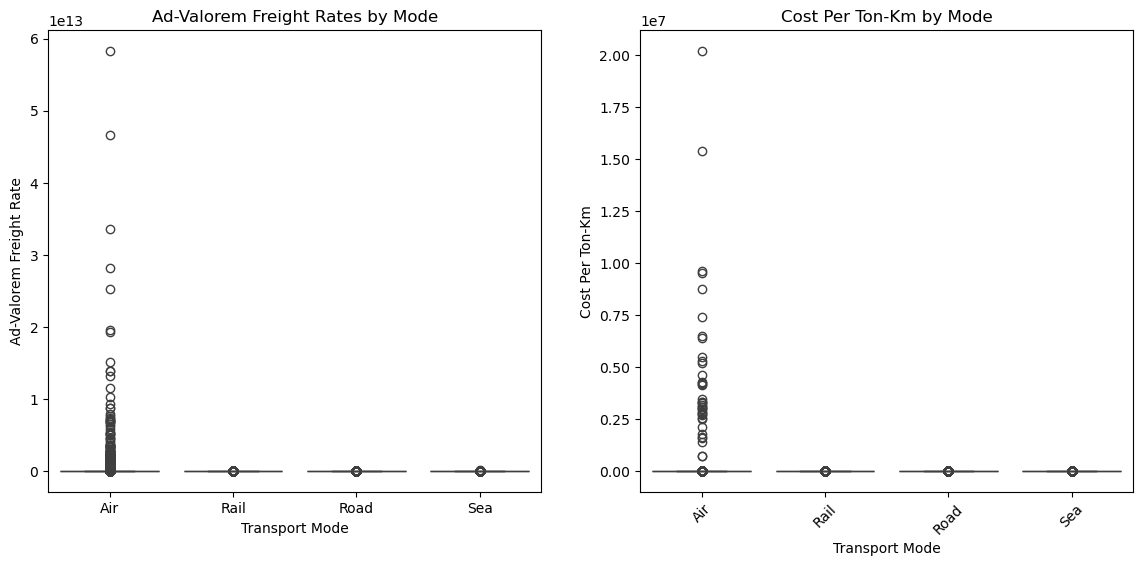

Missing Values:
 origin_city                       0
destination_city                  0
origin_ISO                        0
destination_ISO                   0
year                              0
commodity_index                   0
mode                              0
container_type                    0
ship_type                         0
flow(tonne)                       0
distance(km)                      0
Mode_name                         0
IFM_HS                            0
Unit logistics costs ($/ton)      0
Model                             0
ad_valorem_freight_rate         385
cost_per_ton_km                   0
dtype: int64
Outliers:
 flow(tonne)                     1852025
distance(km)                     126008
Unit logistics costs ($/ton)    1320257
Model                                 0
dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Summary Statistics:
         origin_city  destination_city       year  commodity_index  \
count  9.512578e+06      9.512578e+06  9512578.0     9.512578e+06   
mean   2.128146e+02      2.128146e+02     2020.0     1.236842e+01   
std    1.221296e+02      1.221296e+02        0.0     7.477761e+00   
min    1.000000e+00      1.000000e+00     2020.0     0.000000e+00   
25%    1.060000e+02      1.060000e+02     2020.0     6.000000e+00   
50%    2.130000e+02      2.130000e+02     2020.0     1.300000e+01   
75%    3.130000e+02      3.130000e+02     2020.0     2.000000e+01   
max    4.310000e+02      4.310000e+02     2020.0     2.400000e+01   

               mode  container_type   flow(tonne)  distance(km)  \
count  9.512578e+06    9.512578e+06  9.512578e+06  9.512578e+06   
mean   1.510512e+00    1.631579e+00  1.343120e+03  1.274216e+04   
std    1.307005e+00    1.223047e+00  2.042508e+04  1.422933e+04   
min    0.000000e+00    0.000000e+00  0.000000e+00  2.296630e-03   
25%    0.000000e+00   

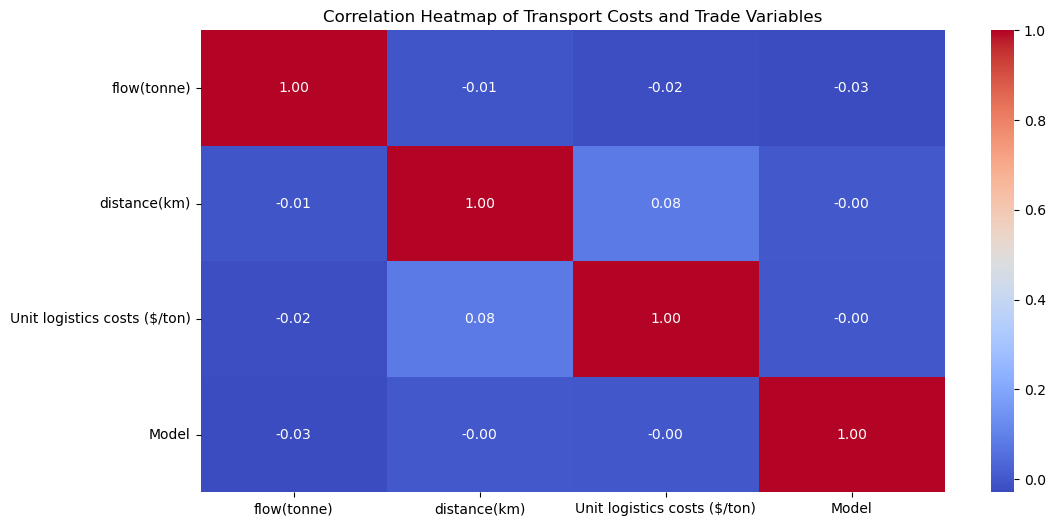

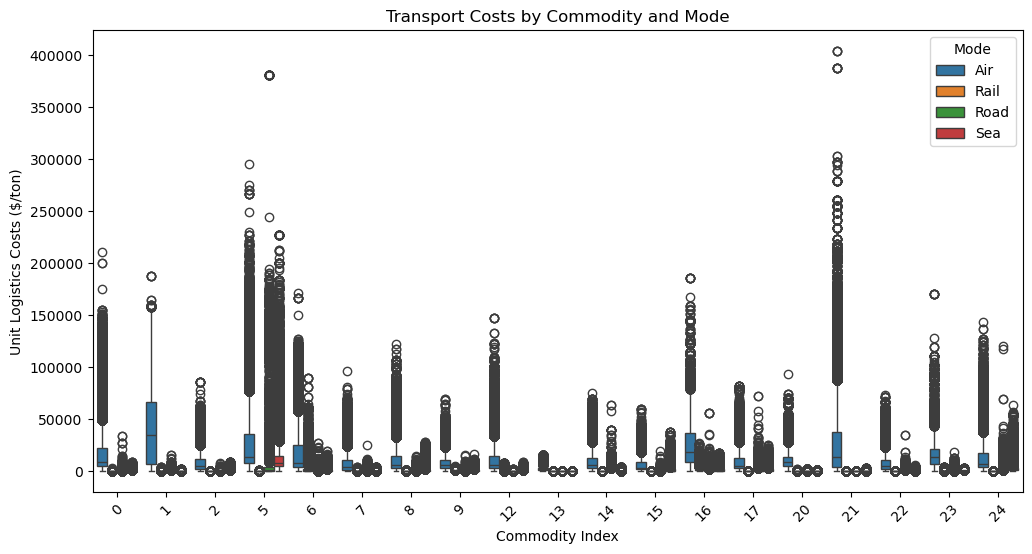

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (Assuming a CSV format; adjust accordingly)
df = pd.read_csv("../data/imputed_full_matrix_at_centroid.csv")

# Display basic information
print(df.info())

# Convert relevant columns to numeric
numeric_cols = ['flow(tonne)', 'distance(km)', 'Unit logistics costs ($/ton)', 'Model']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Task 4: EDA for mode-specific transport costs
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_name', y='Unit logistics costs ($/ton)')
plt.xticks(rotation=45)
plt.title('Mode-Specific Transport Costs')
plt.ylabel('Unit Logistics Costs ($/ton)')
plt.xlabel('Transport Mode')
plt.show()

# Task 5: Identifying transport cost disparities using freight rate metrics
df['ad_valorem_freight_rate'] = df['Unit logistics costs ($/ton)'] / df['flow(tonne)']
df['cost_per_ton_km'] = df['Unit logistics costs ($/ton)'] / df['distance(km)']

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, x='Mode_name', y='ad_valorem_freight_rate', ax=ax[0])
ax[0].set_title('Ad-Valorem Freight Rates by Mode')
ax[0].set_ylabel('Ad-Valorem Freight Rate')
ax[0].set_xlabel('Transport Mode')

sns.boxplot(data=df, x='Mode_name', y='cost_per_ton_km', ax=ax[1])
ax[1].set_title('Cost Per Ton-Km by Mode')
ax[1].set_ylabel('Cost Per Ton-Km')
ax[1].set_xlabel('Transport Mode')

plt.xticks(rotation=45)
plt.show()

# Task 6: Assessing data quality and detecting outliers
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Detecting outliers using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Outliers:\n", outliers)

# Task 7: Generating visual reports and statistical summaries
summary_stats = df.describe()
print("Summary Statistics:\n", summary_stats)

plt.figure(figsize=(12, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Transport Costs and Trade Variables')
plt.show()

# Transport cost inefficiencies and trade barriers visualization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='commodity_index', y='Unit logistics costs ($/ton)', hue='Mode_name')
plt.xticks(rotation=45)
plt.title('Transport Costs by Commodity and Mode')
plt.ylabel('Unit Logistics Costs ($/ton)')
plt.xlabel('Commodity Index')
plt.legend(title='Mode')
plt.show()


Mode Distribution (%):
 Mode_name
Air     36.459328
Sea     36.459328
Road    14.591880
Rail    12.489464
Name: proportion, dtype: float64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3256632865.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Mode_name', order=mode_distribution.index, palette='viridis')


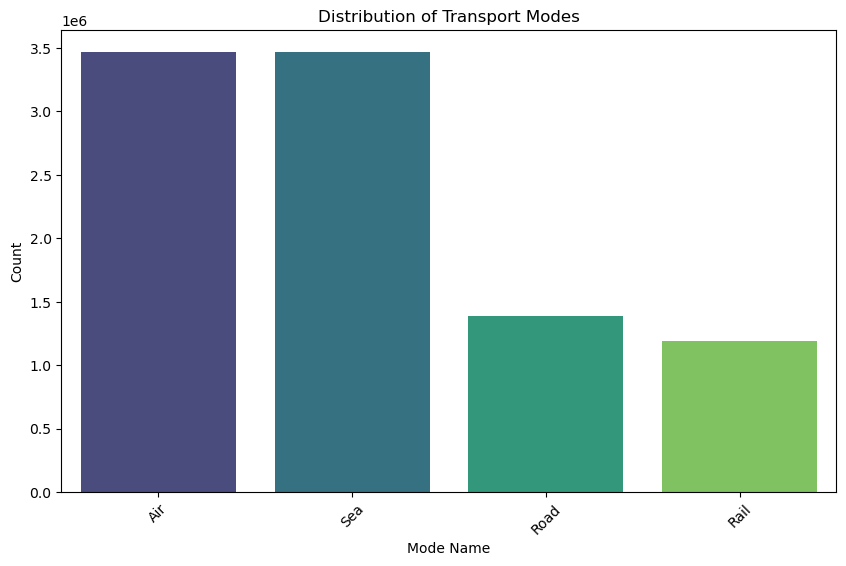

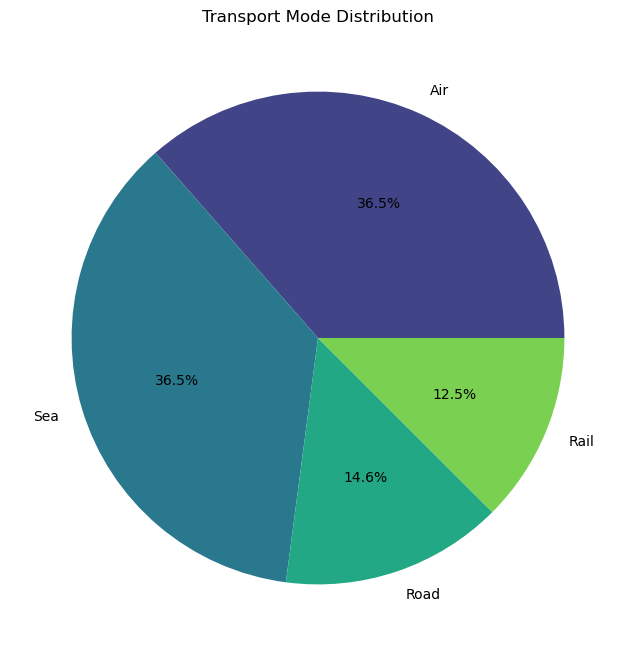

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3256632865.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Mode_name', y='Unit logistics costs ($/ton)', palette='coolwarm')


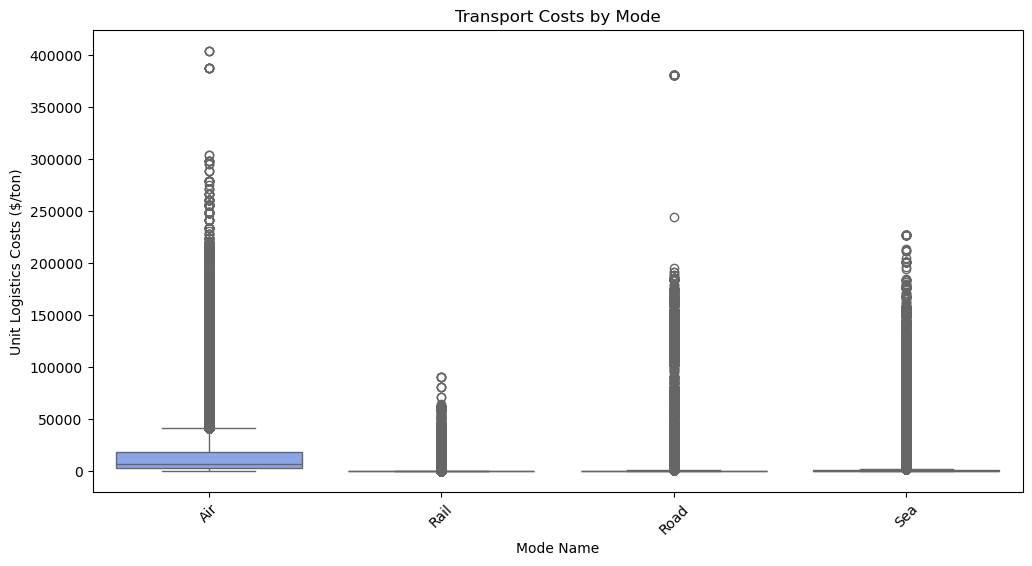

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing Mode_name values (for now)
df = df.dropna(subset=['Mode_name'])

# Get distribution of Mode_name
mode_distribution = df['Mode_name'].value_counts(normalize=True) * 100
print("Mode Distribution (%):\n", mode_distribution)

# Bar plot of transport mode distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Mode_name', order=mode_distribution.index, palette='viridis')
plt.title("Distribution of Transport Modes")
plt.ylabel("Count")
plt.xlabel("Mode Name")
plt.xticks(rotation=45)
plt.show()

# Pie chart of transport mode distribution
plt.figure(figsize=(8, 8))
plt.pie(mode_distribution, labels=mode_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(mode_distribution)))
plt.title("Transport Mode Distribution")
plt.show()

# Analyze transport costs per mode
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Mode_name', y='Unit logistics costs ($/ton)', palette='coolwarm')
plt.xticks(rotation=45)
plt.title("Transport Costs by Mode")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Mode Name")
plt.show()



Missing Values Summary:
                               Missing Count  Missing %
origin_city                               0   0.000000
destination_city                          0   0.000000
origin_ISO                                0   0.000000
destination_ISO                           0   0.000000
year                                      0   0.000000
commodity_index                           0   0.000000
mode                                      0   0.000000
container_type                            0   0.000000
ship_type                                 0   0.000000
flow(tonne)                               0   0.000000
distance(km)                              0   0.000000
Mode_name                                 0   0.000000
IFM_HS                                    0   0.000000
Unit logistics costs ($/ton)              0   0.000000
Model                                     0   0.000000
ad_valorem_freight_rate                 385   0.004047
cost_per_ton_km                        

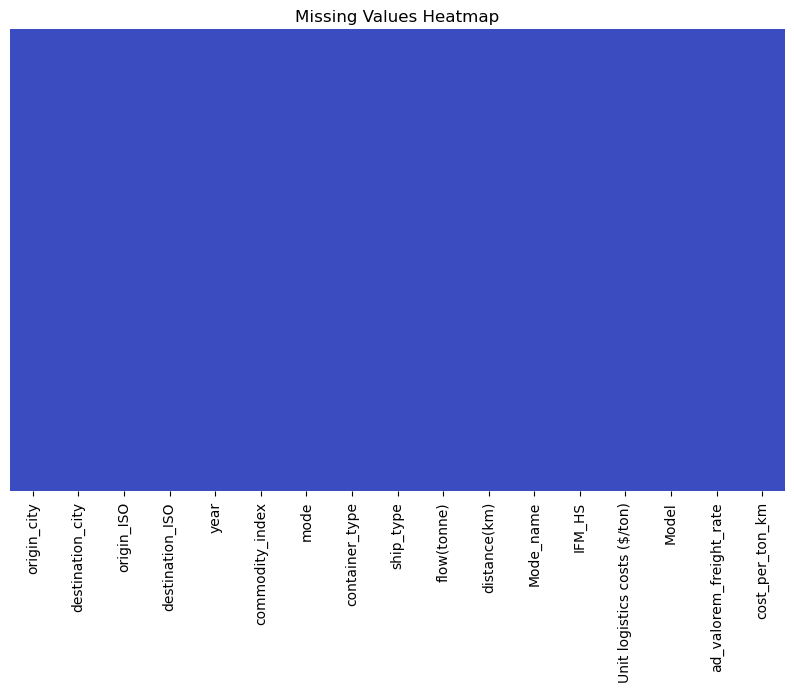


Missing values in Mode_name: 0 (0.00%)

Mode Distribution:
Mode_name
Air     3468222
Sea     3468222
Road    1388064
Rail    1188070
Name: count, dtype: int64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3244004279.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette='viridis')


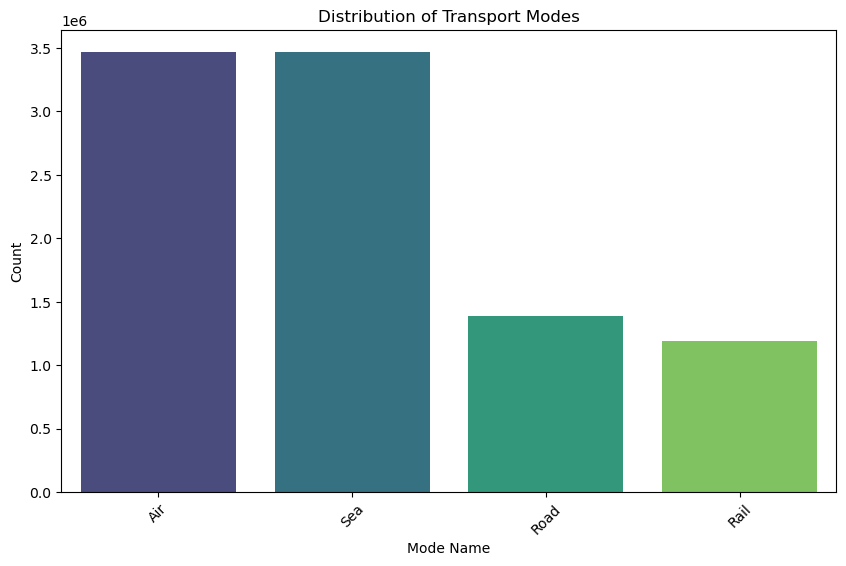

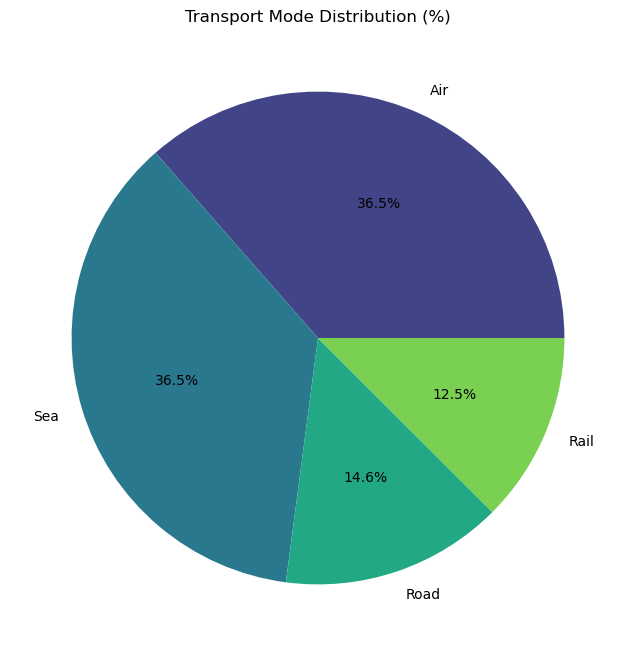

<Figure size 1200x600 with 0 Axes>

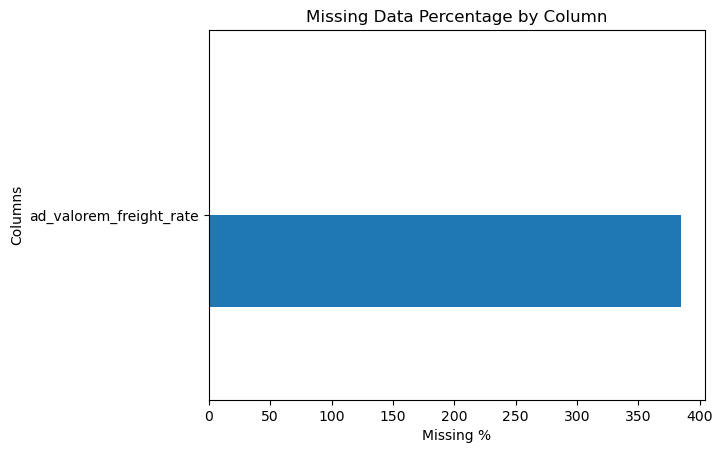

In [3]:
# Count missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({"Missing Count": missing_values, "Missing %": missing_percentage})
print("\nMissing Values Summary:\n", missing_summary)

# Visualizing missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

# Count missing values in Mode_name
mode_missing_count = df['Mode_name'].isnull().sum()
print(f"\nMissing values in Mode_name: {mode_missing_count} ({mode_missing_count/len(df)*100:.2f}%)")

# Distribution of Mode_name (Excluding Missing Values)
mode_distribution = df['Mode_name'].value_counts(dropna=True)
mode_percentage = (mode_distribution / mode_distribution.sum()) * 100

print("\nMode Distribution:")
print(mode_distribution)

# Plot Mode_name distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette='viridis')
plt.xlabel("Mode Name")
plt.ylabel("Count")
plt.title("Distribution of Transport Modes")
plt.xticks(rotation=45)
plt.show()

# Pie Chart for Mode_name Distribution
plt.figure(figsize=(8, 8))
plt.pie(mode_percentage, labels=mode_distribution.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(mode_distribution)))
plt.title("Transport Mode Distribution (%)")
plt.show()

# Missing values count per column (bar plot)
plt.figure(figsize=(12, 6))
missing_summary[missing_summary["Missing Count"] > 0].sort_values("Missing %").plot(kind='barh', legend=False)
plt.title("Missing Data Percentage by Column")
plt.xlabel("Missing %")
plt.ylabel("Columns")
plt.show()


Missing Values:
 origin_city                       0
destination_city                  0
origin_ISO                        0
destination_ISO                   0
year                              0
commodity_index                   0
mode                              0
container_type                    0
ship_type                         0
flow(tonne)                       0
distance(km)                      0
Mode_name                         0
IFM_HS                            0
Unit logistics costs ($/ton)      0
Model                             0
ad_valorem_freight_rate         289
cost_per_ton_km                   0
dtype: int64

Transport Mode Distribution in Africa:
 Mode_name
Air     71402
Sea     71402
Road    58064
Rail    53922
Name: count, dtype: int64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3997868019.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette="viridis")


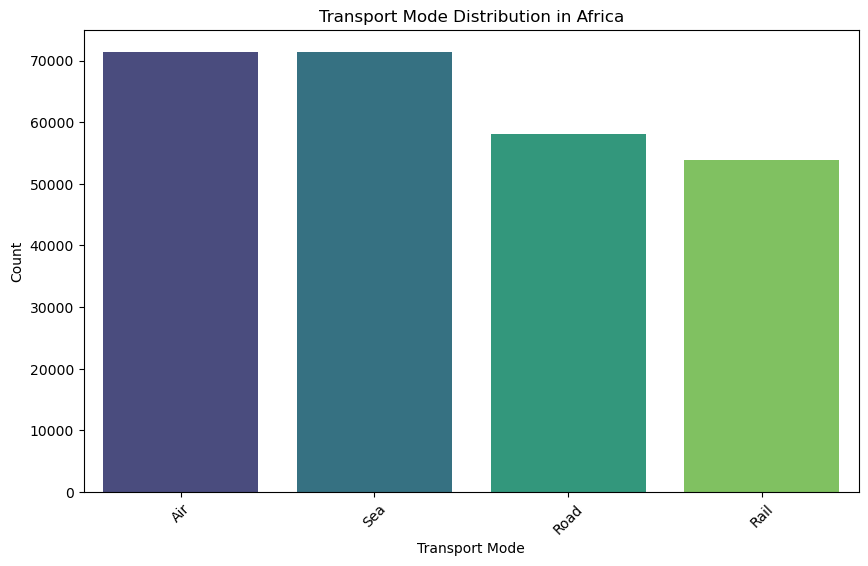

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3997868019.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="Mode_name", y="Unit logistics costs ($/ton)", palette="coolwarm")


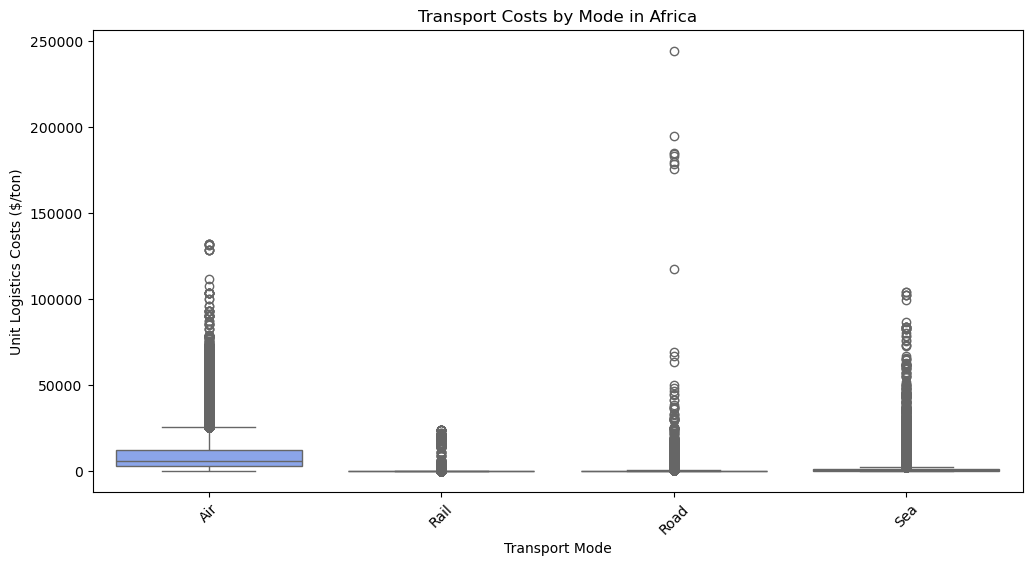


Outliers in Transport Data:
 flow(tonne)                     45652
distance(km)                     4218
Unit logistics costs ($/ton)    36443
dtype: int64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3997868019.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")
/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/3997868019.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="landlocked", y="Unit logistics costs ($/ton)", palette="magma")


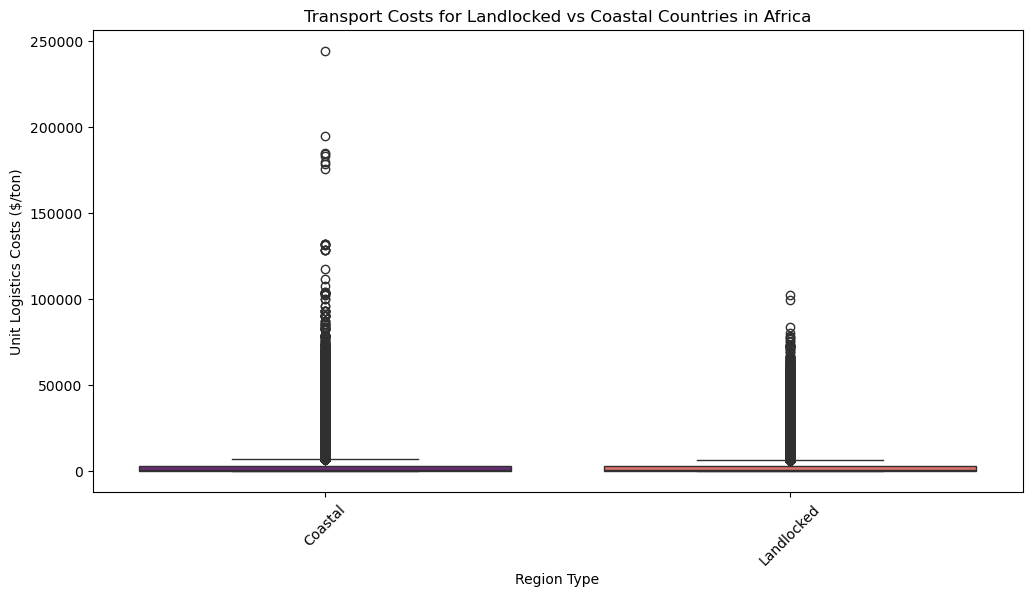

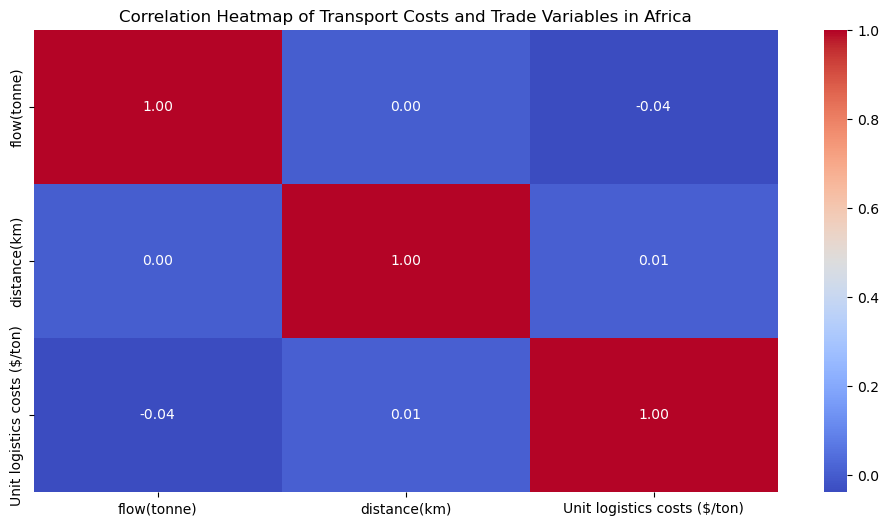

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Filter only African routes (Assuming 'origin_ISO' and 'destination_ISO' contain country codes)
african_countries = ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", "CAF", "TCD", 
                     "COM", "COG", "COD", "DJI", "EGY", "GNQ", "ERI", "ETH", "GAB", "GMB",
                     "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI",
                     "MLI", "MRT", "MUS", "MYT", "MAR", "MOZ", "NAM", "NER", "NGA", "RWA",
                     "REU", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TGO",
                     "TUN", "UGA", "TZA", "ZMB", "ZWE"]

df_africa = df[(df["origin_ISO"].isin(african_countries)) & (df["destination_ISO"].isin(african_countries))]

# Check missing values
missing_values = df_africa.isnull().sum()
print("\nMissing Values:\n", missing_values)

# 🔹 **1. Distribution of Transport Modes in Africa**
mode_distribution = df_africa["Mode_name"].value_counts()
print("\nTransport Mode Distribution in Africa:\n", mode_distribution)

# Plot transport mode distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=mode_distribution.index, y=mode_distribution.values, palette="viridis")
plt.xlabel("Transport Mode")
plt.ylabel("Count")
plt.title("Transport Mode Distribution in Africa")
plt.xticks(rotation=45)
plt.show()

# 🔹 **2. Cost Comparison Across Transport Modes**
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_africa, x="Mode_name", y="Unit logistics costs ($/ton)", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Transport Costs by Mode in Africa")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Transport Mode")
plt.show()

# 🔹 **3. Transport Inefficiencies and Barriers (Outliers)**
# Detecting Outliers Using IQR
numeric_cols = ['flow(tonne)', 'distance(km)', 'Unit logistics costs ($/ton)']
Q1 = df_africa[numeric_cols].quantile(0.25)
Q3 = df_africa[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df_africa[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_africa[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers in Transport Data:\n", outliers)

# 🔹 **4. Regional Transport Trends (Landlocked vs. Coastal)**
landlocked_countries = ["BWA", "BFA", "BDI", "CAF", "TCD", "ETH", "LSO", "MWI", "MLI", "NER", "RWA", "SSD", "UGA", "ZMB", "ZWE"]

df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")

# Boxplot for transport costs comparison between landlocked and coastal countries
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_africa, x="landlocked", y="Unit logistics costs ($/ton)", palette="magma")
plt.xticks(rotation=45)
plt.title("Transport Costs for Landlocked vs Coastal Countries in Africa")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Region Type")
plt.show()

# 🔹 **5. Correlation Analysis for Cost Determinants**
plt.figure(figsize=(12, 6))
sns.heatmap(df_africa[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Transport Costs and Trade Variables in Africa")
plt.show()



Top 10 Most Expensive Transport Routes:
 origin_ISO  destination_ISO
MUS         DZA                18286.021089
            CPV                18137.828637
            MAR                17684.977065
            GIN                17497.533537
            BFA                17077.127762
MAR         MUS                17002.358715
CPV         MUS                16667.936006
GIN         SYC                16437.646348
SEN         MUS                16266.548646
MUS         SEN                16204.331809
Name: Unit logistics costs ($/ton), dtype: float64


/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/495495269.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="origin_ISO", y="Unit logistics costs ($/ton)", palette="coolwarm")


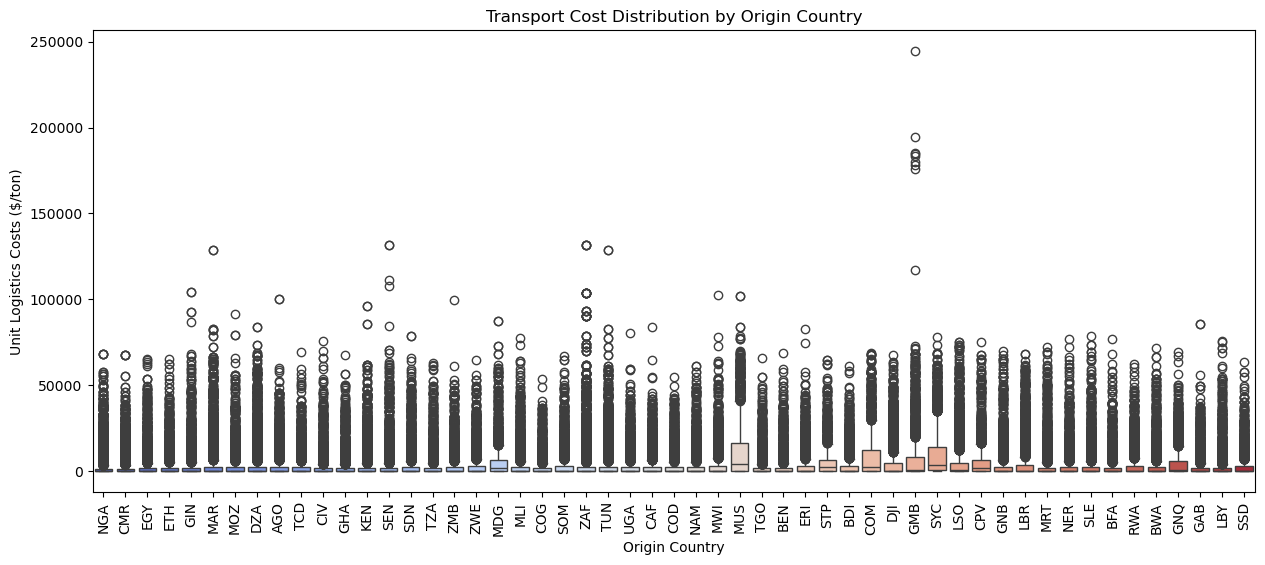

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/495495269.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")
/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/495495269.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_africa, x="landlocked", y="Unit logistics costs ($/ton)", palette="magma")


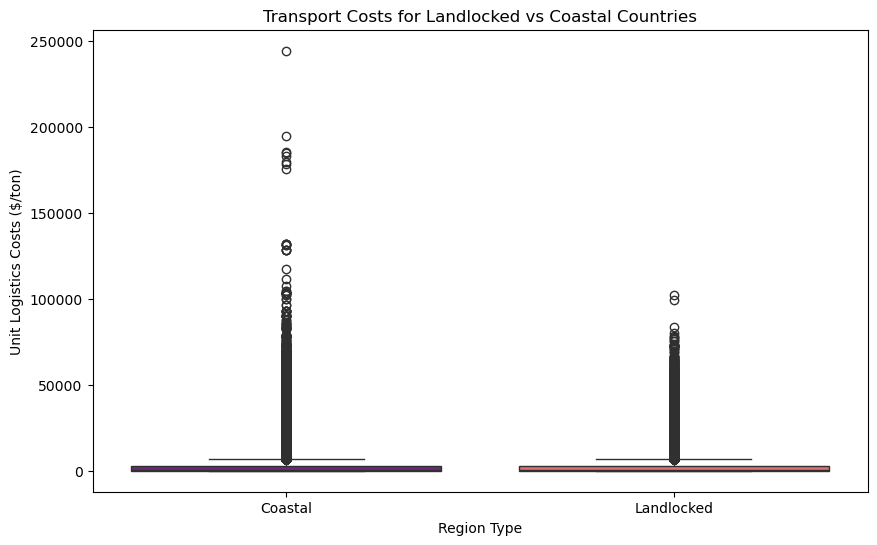

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/495495269.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_africa["cost_per_ton_km"] = df_africa["Unit logistics costs ($/ton)"] / df_africa["distance(km)"]



Top 10 Countries with Highest Cost per Ton-Km:
 origin_ISO
MUS    1.473008
SYC    1.458092
COM    1.451074
GNQ    1.111926
GMB    1.053894
STP    0.948248
CPV    0.878632
LSO    0.871233
MDG    0.853356
LBR    0.813432
Name: cost_per_ton_km, dtype: float64


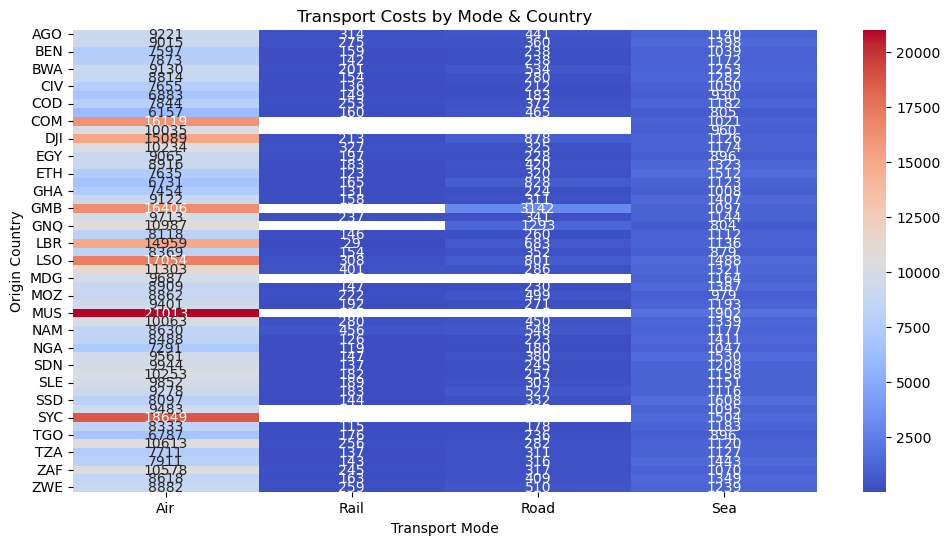

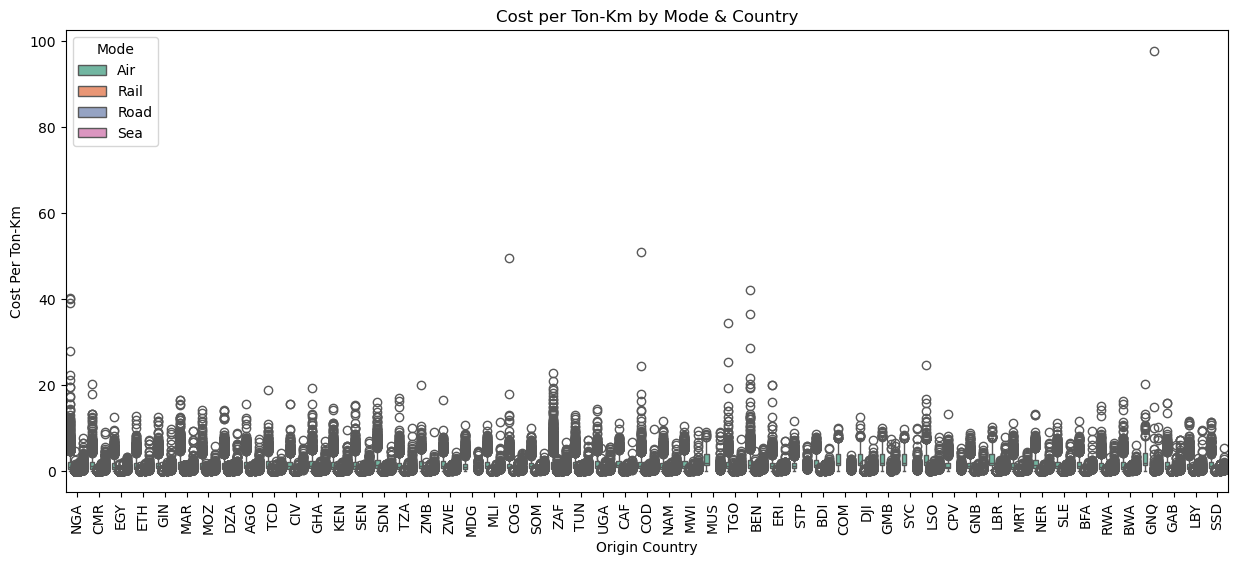

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define African countries for regional analysis
african_countries = ["DZA", "AGO", "BEN", "BWA", "BFA", "BDI", "CMR", "CPV", "CAF", "TCD", 
                     "COM", "COG", "COD", "DJI", "EGY", "GNQ", "ERI", "ETH", "GAB", "GMB",
                     "GHA", "GIN", "GNB", "CIV", "KEN", "LSO", "LBR", "LBY", "MDG", "MWI",
                     "MLI", "MRT", "MUS", "MYT", "MAR", "MOZ", "NAM", "NER", "NGA", "RWA",
                     "REU", "STP", "SEN", "SYC", "SLE", "SOM", "ZAF", "SSD", "SDN", "TGO",
                     "TUN", "UGA", "TZA", "ZMB", "ZWE"]

# Filter dataset for African trade routes
df_africa = df[(df["origin_ISO"].isin(african_countries)) & (df["destination_ISO"].isin(african_countries))]

# Identify top 10 most expensive transport routes
high_cost_routes = df_africa.groupby(["origin_ISO", "destination_ISO"])["Unit logistics costs ($/ton)"].mean().nlargest(10)
print("\nTop 10 Most Expensive Transport Routes:\n", high_cost_routes)

# Plot transport cost distribution by country
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_africa, x="origin_ISO", y="Unit logistics costs ($/ton)", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Transport Cost Distribution by Origin Country")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Origin Country")
plt.show()

# Define landlocked countries
landlocked_countries = ["BWA", "BFA", "BDI", "CAF", "TCD", "ETH", "LSO", "MWI", "MLI", "NER", "RWA", "SSD", "UGA", "ZMB", "ZWE"]
df_africa["landlocked"] = df_africa["origin_ISO"].apply(lambda x: "Landlocked" if x in landlocked_countries else "Coastal")

# Boxplot: Transport costs for Landlocked vs Coastal countries
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_africa, x="landlocked", y="Unit logistics costs ($/ton)", palette="magma")
plt.title("Transport Costs for Landlocked vs Coastal Countries")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.xlabel("Region Type")
plt.show()

# Identify countries with highest cost per ton-km
df_africa["cost_per_ton_km"] = df_africa["Unit logistics costs ($/ton)"] / df_africa["distance(km)"]
high_cost_countries = df_africa.groupby("origin_ISO")["cost_per_ton_km"].mean().nlargest(10)
print("\nTop 10 Countries with Highest Cost per Ton-Km:\n", high_cost_countries)

# Transport inefficiencies: Heatmap of cost disparities by mode
plt.figure(figsize=(12, 6))
cost_pivot = df_africa.pivot_table(index="origin_ISO", columns="Mode_name", values="Unit logistics costs ($/ton)", aggfunc="mean")
sns.heatmap(cost_pivot, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Transport Costs by Mode & Country")
plt.ylabel("Origin Country")
plt.xlabel("Transport Mode")
plt.show()

# Boxplot: Transport mode inefficiencies by country
plt.figure(figsize=(15, 6))
sns.boxplot(data=df_africa, x="origin_ISO", y="cost_per_ton_km", hue="Mode_name", palette="Set2")
plt.xticks(rotation=90)
plt.title("Cost per Ton-Km by Mode & Country")
plt.ylabel("Cost Per Ton-Km")
plt.xlabel("Origin Country")
plt.legend(title="Mode")
plt.show()


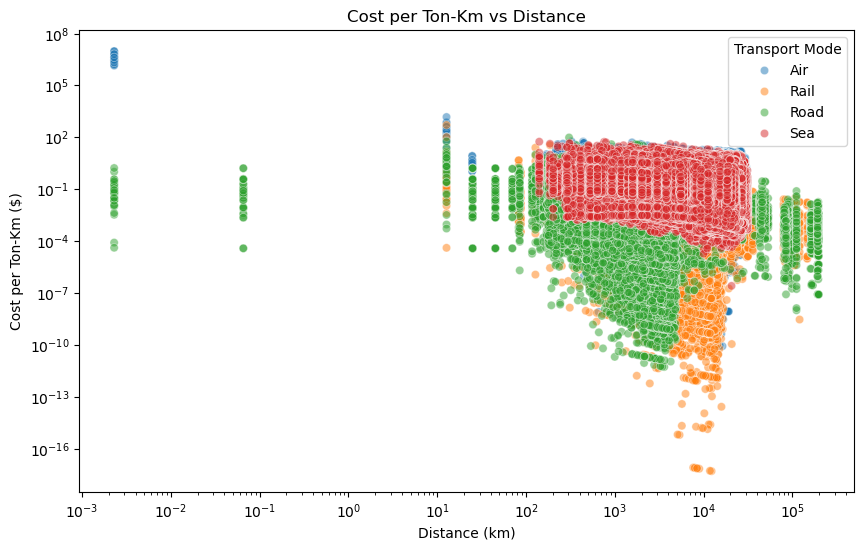

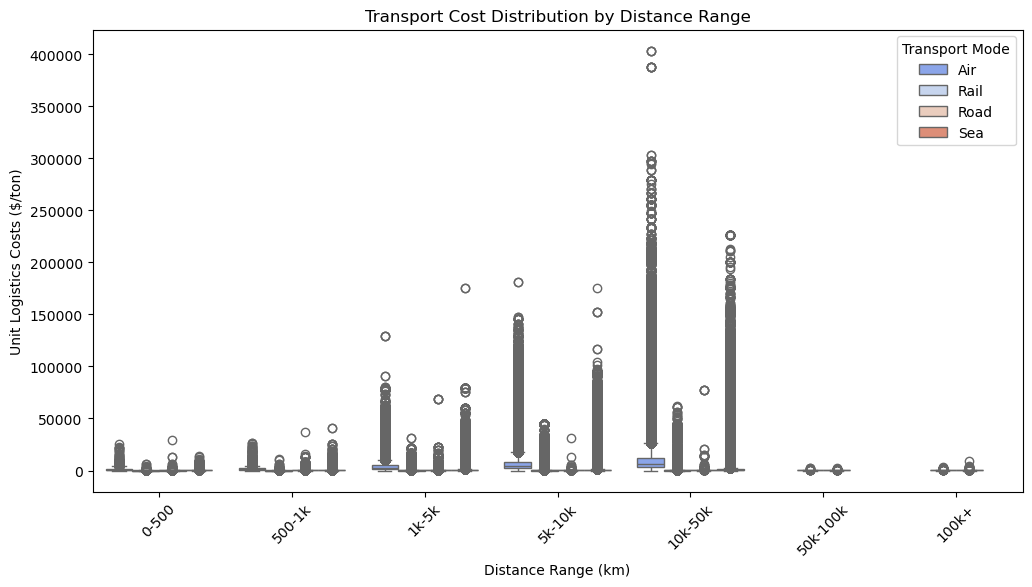

/var/folders/dt/pqrpvqxj6jnfx7sqqlbyy7_w0000gn/T/ipykernel_50794/24237229.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_cost_distance = df.groupby(["distance_category", "Mode_name"])["cost_per_ton_km"].mean().reset_index()


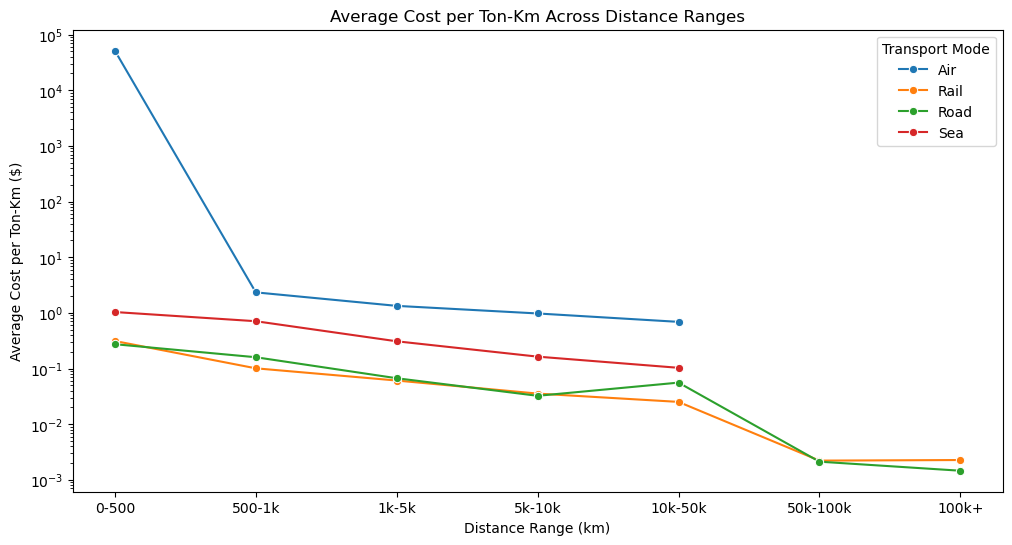

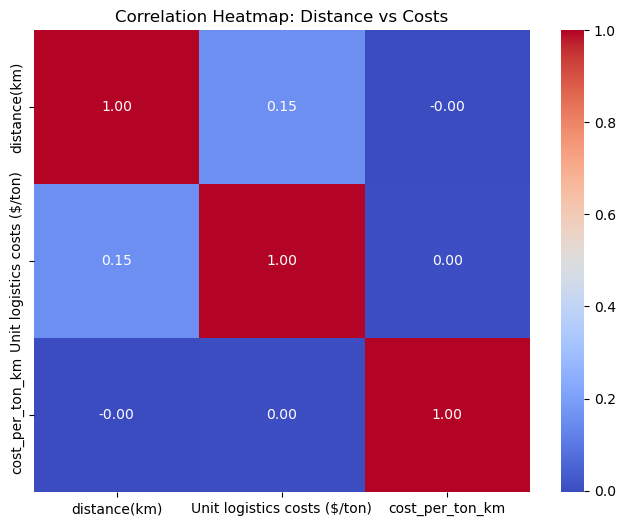


Top 10 Most Inefficient Routes (High Cost per Ton-Km):
         origin_ISO destination_ISO  distance(km)  \
3443439        PSE             ISR      0.002297   
3337457        ISR             PSE      0.002297   
3337448        ISR             PSE      0.002297   
3337460        ISR             PSE      0.002297   
3443430        PSE             ISR      0.002297   
3443442        PSE             ISR      0.002297   
3443427        PSE             ISR      0.002297   
3337445        ISR             PSE      0.002297   
3337449        ISR             PSE      0.002297   
3443431        PSE             ISR      0.002297   

         Unit logistics costs ($/ton)  cost_per_ton_km Mode_name  
3443439                  22094.084946     9.620221e+06       Air  
3337457                  21847.008227     9.512639e+06       Air  
3337448                  20086.642297     8.746139e+06       Air  
3337460                  17040.754881     7.419897e+06       Air  
3443430                  14938.6635

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Convert distance and cost columns to numeric
df["distance(km)"] = pd.to_numeric(df["distance(km)"], errors="coerce")
df["Unit logistics costs ($/ton)"] = pd.to_numeric(df["Unit logistics costs ($/ton)"], errors="coerce")

# Calculate cost per ton-km
df["cost_per_ton_km"] = df["Unit logistics costs ($/ton)"] / df["distance(km)"]

# Remove potential infinite values (cases where distance is zero)
df = df.replace([float("inf"), -float("inf")], None).dropna()

# 🔹 **1. Scatter Plot: Cost per Ton-Km vs Distance**
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="distance(km)", y="cost_per_ton_km", hue="Mode_name", alpha=0.5)
plt.xscale("log")  # Log scale to handle wide range of distances
plt.yscale("log")  # Log scale for better visualization of cost variations
plt.title("Cost per Ton-Km vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Cost per Ton-Km ($)")
plt.legend(title="Transport Mode")
plt.show()

# 🔹 **2. Boxplot: Transport Cost Distribution Across Distance Ranges**
df["distance_category"] = pd.cut(df["distance(km)"], bins=[0, 500, 1000, 5000, 10000, 50000, 100000, df["distance(km)"].max()], 
                                 labels=["0-500", "500-1k", "1k-5k", "5k-10k", "10k-50k", "50k-100k", "100k+"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="distance_category", y="Unit logistics costs ($/ton)", hue="Mode_name", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Transport Cost Distribution by Distance Range")
plt.xlabel("Distance Range (km)")
plt.ylabel("Unit Logistics Costs ($/ton)")
plt.legend(title="Transport Mode")
plt.show()

# 🔹 **3. Line Plot: Average Cost per Ton-Km Across Distance Ranges**
avg_cost_distance = df.groupby(["distance_category", "Mode_name"])["cost_per_ton_km"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_cost_distance, x="distance_category", y="cost_per_ton_km", hue="Mode_name", marker="o")
plt.yscale("log")
plt.title("Average Cost per Ton-Km Across Distance Ranges")
plt.xlabel("Distance Range (km)")
plt.ylabel("Average Cost per Ton-Km ($)")
plt.legend(title="Transport Mode")
plt.show()

# 🔹 **4. Correlation Analysis: Distance vs Transport Costs**
plt.figure(figsize=(8, 6))
sns.heatmap(df[["distance(km)", "Unit logistics costs ($/ton)", "cost_per_ton_km"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Distance vs Costs")
plt.show()

# 🔹 **5. Identifying Inefficient Transport Costs for Given Distance**
# Sort by cost per ton-km and highlight top 10 most inefficient routes
inefficient_routes = df.nlargest(10, "cost_per_ton_km")[["origin_ISO", "destination_ISO", "distance(km)", "Unit logistics costs ($/ton)", "cost_per_ton_km", "Mode_name"]]
print("\nTop 10 Most Inefficient Routes (High Cost per Ton-Km):\n", inefficient_routes)

